>


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Laptop Price Prediction </h1>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-laptop-data-explore-analyze-predict/Amazon Laptop Data.csv


<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">Library import</p>



In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">Load Data</p>


In [3]:
df = pd.read_csv('/kaggle/input/amazon-laptop-data-explore-analyze-predict/Amazon Laptop Data.csv', encoding='latin-1')
df.head()

,Product Name,Original Price (in Rs.),Discount Percentage,Final Price (in Rs.),Ratings,Total Ratings count
0,Dell 14 Laptop,"57,778",39%,"34,990",3.8,499
1,Dell 15 Laptop,"51,254",22%,"39,990",4.3,19
2,Dell Inspiron 3530 Laptop,"87,262",30%,"60,990",3.7,68
3,HP Laptop 15s,"56,261",33%,"37,699",4,755
4,"Lenovo V15 Intel Celeron N4500 15.6"" (39.62 cm...","42,032",52%,"19,990",3.8,255


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product Name             7462 non-null   object
 1   Original Price (in Rs.)  7462 non-null   object
 2   Discount Percentage      7455 non-null   object
 3   Final Price (in Rs.)     7462 non-null   object
 4   Ratings                  7462 non-null   object
 5   Total Ratings count      7462 non-null   object
dtypes: object(6)
memory usage: 349.9+ KB


<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">Handling missing Data</p>

In [5]:
df.isnull().sum()

Product Name               0
Original Price (in Rs.)    0
Discount Percentage        7
Final Price (in Rs.)       0
Ratings                    0
Total Ratings count        0
dtype: int64

Drop the missing data of size

In [6]:

df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Product Name               0
Original Price (in Rs.)    0
Discount Percentage        0
Final Price (in Rs.)       0
Ratings                    0
Total Ratings count        0
dtype: int64

In [8]:
df.shape

(7455, 6)

<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">statastical summary</p>


In [9]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,unique,top,freq
Product Name,7455,2858,Dell 15 Laptop,325
Original Price (in Rs.),7455,1300,"1,29,990",499
Discount Percentage,7455,90,19%,536
Final Price (in Rs.),7455,2051,"1,04,999",492
Ratings,7455,38,No Ratings,3725
Total Ratings count,7455,287,No Ratings,3725


<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">Handling Object Type columns</p>


In [10]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Product Name,Original Price (in Rs.),Discount Percentage,Final Price (in Rs.),Ratings,Total Ratings count
0,Dell 14 Laptop,"57,778",39%,"34,990",3.8,499
1,Dell 15 Laptop,"51,254",22%,"39,990",4.3,19
2,Dell Inspiron 3530 Laptop,"87,262",30%,"60,990",3.7,68
3,HP Laptop 15s,"56,261",33%,"37,699",4,755
4,"Lenovo V15 Intel Celeron N4500 15.6"" (39.62 cm...","42,032",52%,"19,990",3.8,255
...,...,...,...,...,...,...
7457,ELECTROPRIME 4068 Smart HD Quad Core Radio WiF...,"8,924",8%,"8,187",No Ratings,No Ratings
7458,ELECTROPRIME Portable 7 Inches Quad Core OTG M...,"8,924",8%,"8,187",No Ratings,No Ratings
7459,Lenovo IdeaPad Slim 5 13th Gen Intel Core i5 1...,"1,05,190",32%,"71,690",4.1,25
7460,Lenovo IdeaPad Slim 5 12th Gen Intel Core i5 1...,"82,590",25%,"61,720",4.1,83


In [11]:
df[object_columns]

,Product Name,Original Price (in Rs.),Discount Percentage,Final Price (in Rs.),Ratings,Total Ratings count
0,Dell 14 Laptop,"57,778",39%,"34,990",3.8,499
1,Dell 15 Laptop,"51,254",22%,"39,990",4.3,19
2,Dell Inspiron 3530 Laptop,"87,262",30%,"60,990",3.7,68
3,HP Laptop 15s,"56,261",33%,"37,699",4,755
4,"Lenovo V15 Intel Celeron N4500 15.6"" (39.62 cm...","42,032",52%,"19,990",3.8,255
...,...,...,...,...,...,...
7457,ELECTROPRIME 4068 Smart HD Quad Core Radio WiF...,"8,924",8%,"8,187",No Ratings,No Ratings
7458,ELECTROPRIME Portable 7 Inches Quad Core OTG M...,"8,924",8%,"8,187",No Ratings,No Ratings
7459,Lenovo IdeaPad Slim 5 13th Gen Intel Core i5 1...,"1,05,190",32%,"71,690",4.1,25
7460,Lenovo IdeaPad Slim 5 12th Gen Intel Core i5 1...,"82,590",25%,"61,720",4.1,83


<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;"> Idntify Numerical columns</h1>
</div>

In [12]:
def calculate_non_numeric_percentage(df, column_name):
    df[column_name] = df[column_name].astype(str)
    cleaned_column = df[column_name].str.replace(',', '')
    numeric_column = pd.to_numeric(cleaned_column, errors='coerce')
    non_numeric_count = numeric_column.isna().sum()
    total_count = len(df[column_name])
    non_numeric_percentage = (non_numeric_count / total_count) * 100
    return non_numeric_percentage
columns_with_high_numeric_percentage = []

for column in df.columns:
    if df[column].dtype == 'object': 
        non_numeric_percentage = calculate_non_numeric_percentage(df, column)
        numeric_percentage = 100 - non_numeric_percentage
        
        # Check if more than 40% of the data is numeric
        if numeric_percentage > 40:
            columns_with_high_numeric_percentage.append(column)

print("Columns with more than 40% numeric data:")
print(columns_with_high_numeric_percentage)


Columns with more than 40% numeric data:
['Original Price (in Rs.)', 'Final Price (in Rs.)', 'Ratings', 'Total Ratings count']


<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;"> 
1. It identifies columns where more than 40% of the data can be converted to numeric values by removing commas and converting them.<br>
2. For columns meeting this criterion and with less than 5% non-numeric data, it removes rows with NaN values after converting values to numeric.<br>
3. Columns failing these conditions are converted to numeric, and non-numeric data is coerced to NaN.</h1>
</div>


In [13]:
def calculate_non_numeric_percentage(df, column_name):
    df[column_name] = df[column_name].astype(str)
    cleaned_column = df[column_name].str.replace(',', '')
    numeric_column = pd.to_numeric(cleaned_column, errors='coerce')
    non_numeric_count = numeric_column.isna().sum()
    total_count = len(df[column_name])
    non_numeric_percentage = (non_numeric_count / total_count) * 100
    
    return non_numeric_percentage
columns_with_high_numeric_percentage = []
for column in df.columns:
    if df[column].dtype == 'object':  
        non_numeric_percentage = calculate_non_numeric_percentage(df, column)
        numeric_percentage = 100 - non_numeric_percentage
        
        # Check if more than 40% of the data is numeric
        if numeric_percentage > 40:
            columns_with_high_numeric_percentage.append(column)

for column in columns_with_high_numeric_percentage:
    non_numeric_percentage = calculate_non_numeric_percentage(df, column)
    if non_numeric_percentage < 5:
        df[column] = df[column].astype(str)
        # Replace commas in the column values to handle numbers formatted with commas
        cleaned_column = df[column].str.replace(',', '')
        # Convert the column to numeric values, coercing errors to NaN
        numeric_column = pd.to_numeric(cleaned_column, errors='coerce')
        # Drop rows with NaN values
        df = df.dropna(subset=[column])
    else:
        # Convert all values to string first
        df[column] = df[column].astype(str)
        # Replace commas in the column values to handle numbers formatted with commas
        cleaned_column = df[column].str.replace(',', '')
        # Convert the column to numeric values, coercing errors to NaN
        df[column] = pd.to_numeric(cleaned_column, errors='coerce')
print(df.head(10))
print(df.info())


                                        Product Name Original Price (in Rs.)  \
0                                     Dell 14 Laptop                  57,778   
1                                     Dell 15 Laptop                  51,254   
2                          Dell Inspiron 3530 Laptop                  87,262   
3                                      HP Laptop 15s                  56,261   
4  Lenovo V15 Intel Celeron N4500 15.6" (39.62 cm...                  42,032   
5                                     Dell 14 Laptop                  57,778   
6                                  TECNO MEGABOOK T1                  49,999   
7                   Apple MacBook Air Laptop M1 chip                  89,900   
8  (Refurbished) Lenovo ThinkPad 6th Gen Intel Co...                  89,999   
9  Lenovo V15 AMD Ryzen 3 7320U 15.6" (39.62cm) F...                  89,765   

  Discount Percentage Final Price (in Rs.)  Ratings  Total Ratings count  
0                 39%               34,990  

In [14]:
object_column = df.select_dtypes(include=['object']).columns
df[object_column]
for column in object_column:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Product Name':
['Dell 14 Laptop' 'Dell 15 Laptop' 'Dell Inspiron 3530 Laptop' ...
 'ELECTROPRIME Usb3.0 2.5Inch Computer Laptop Tools Mobile Electronic Sata Notebook Hard D R9T8'
 'Zahara Power Switch Button Board W/Cable Replacement for HP Pavilion 15-n028us 15-n030ca 15-n030us 15-n037cl 15-n040ca 15-n040us'
 'HP - Intel Pavilion x360 2-in-1 11.6" Touch-Screen 4 GB Windows 10 Laptop']

Unique values in 'Original Price (in Rs.)':
['57,778' '51,254' '87,262' ... '2,166' '5,030' '1,02,645']

Unique values in 'Discount Percentage':
['39%' '22%' '30%' '33%' '52%' '18%' '78%' '70%' '36%' '24%' '19%' '51%'
 '40%' '48%' '29%' '35%' '32%' '26%' '46%' '41%' '20%' '27%' '25%' '68%'
 '38%' '86%' '34%' '44%' '74%' '63%' '37%' '73%' '23%' '16%' '83%' '60%'
 '28%' '82%' '80%' '7%' '21%' '3%' '76%' '31%' '56%' '17%' '77%' '79%'
 '6%' '69%' '12%' '62%' '47%' '84%' '15%' '54%' '8%' '72%' '58%' '42%'
 '49%' '85%' '1%' '13%' '81%' '53%' '67%' '66%' '61%' '2%' '87%' '5%'
 '43%' '65%' '11

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;"> 
        Cleans specified columns by removing commas and percentage symbols,
        then converts them to numeric values with errors coerced to NaN.
    </h1>
</div>

In [15]:

def clean_and_convert_columns(df, columns):
    for column in columns:
        df[column] = df[column].str.replace(',', '').str.replace('%', '')
        # Convert to numeric values, coercing errors to NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df
columns_to_clean = ['Original Price (in Rs.)', 'Discount Percentage', 'Final Price (in Rs.)']
df = clean_and_convert_columns(df, columns_to_clean)
df

,Product Name,Original Price (in Rs.),Discount Percentage,Final Price (in Rs.),Ratings,Total Ratings count
0,Dell 14 Laptop,57778.0,39,34990.0,3.8,499.0
1,Dell 15 Laptop,51254.0,22,39990.0,4.3,19.0
2,Dell Inspiron 3530 Laptop,87262.0,30,60990.0,3.7,68.0
3,HP Laptop 15s,56261.0,33,37699.0,4.0,755.0
4,"Lenovo V15 Intel Celeron N4500 15.6"" (39.62 cm...",42032.0,52,19990.0,3.8,255.0
...,...,...,...,...,...,...
7457,ELECTROPRIME 4068 Smart HD Quad Core Radio WiF...,8924.0,8,8187.0,NaN,NaN
7458,ELECTROPRIME Portable 7 Inches Quad Core OTG M...,8924.0,8,8187.0,NaN,NaN
7459,Lenovo IdeaPad Slim 5 13th Gen Intel Core i5 1...,105190.0,32,71690.0,4.1,25.0
7460,Lenovo IdeaPad Slim 5 12th Gen Intel Core i5 1...,82590.0,25,61720.0,4.1,83.0


In [16]:
object_column = df.select_dtypes(include=['object']).columns
df[object_column]
for column in object_column:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Product Name':
['Dell 14 Laptop' 'Dell 15 Laptop' 'Dell Inspiron 3530 Laptop' ...
 'ELECTROPRIME Usb3.0 2.5Inch Computer Laptop Tools Mobile Electronic Sata Notebook Hard D R9T8'
 'Zahara Power Switch Button Board W/Cable Replacement for HP Pavilion 15-n028us 15-n030ca 15-n030us 15-n037cl 15-n040ca 15-n040us'
 'HP - Intel Pavilion x360 2-in-1 11.6" Touch-Screen 4 GB Windows 10 Laptop']



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7455 entries, 0 to 7461
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             7455 non-null   object 
 1   Original Price (in Rs.)  7455 non-null   float64
 2   Discount Percentage      7455 non-null   int64  
 3   Final Price (in Rs.)     7455 non-null   float64
 4   Ratings                  3730 non-null   float64
 5   Total Ratings count      3730 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 407.7+ KB


In [18]:

unique_values_count = df['Product Name'].nunique()

print(f"Number of unique values in 'Product Name' column: {unique_values_count}")


Number of unique values in 'Product Name' column: 2858


In [19]:
drop_col=['Product Name']
df.drop(drop_col,inplace=True,axis=1)

In [20]:
df.shape

(7455, 5)

In [21]:
nan_percentage = df.isna().mean() * 100
columns_to_drop = nan_percentage[nan_percentage < 20].index
df = df.dropna(subset=columns_to_drop)
df = df.fillna(df.mean())

df

,Original Price (in Rs.),Discount Percentage,Final Price (in Rs.),Ratings,Total Ratings count
0,57778.0,39,34990.0,3.800000,499.000000
1,51254.0,22,39990.0,4.300000,19.000000
2,87262.0,30,60990.0,3.700000,68.000000
3,56261.0,33,37699.0,4.000000,755.000000
4,42032.0,52,19990.0,3.800000,255.000000
...,...,...,...,...,...
7457,8924.0,8,8187.0,3.730643,96.534048
7458,8924.0,8,8187.0,3.730643,96.534048
7459,105190.0,32,71690.0,4.100000,25.000000
7460,82590.0,25,61720.0,4.100000,83.000000


In [22]:
colum=df.columns
colum

Index(['Original Price (in Rs.)', 'Discount Percentage',
       'Final Price (in Rs.)', 'Ratings', 'Total Ratings count'],
      dtype='object')

In [23]:
df1=df

<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">Feature scaling</p>


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)


In [25]:
df1=pd.DataFrame(df1,columns=colum)

In [26]:
df1

,Original Price (in Rs.),Discount Percentage,Final Price (in Rs.),Ratings,Total Ratings count
0,0.099040,0.426966,0.071239,0.700000,0.017143
1,0.087833,0.235955,0.081448,0.825000,0.000620
2,0.149685,0.325843,0.124324,0.675000,0.002306
3,0.096434,0.359551,0.076770,0.750000,0.025955
4,0.071993,0.573034,0.040614,0.700000,0.008744
...,...,...,...,...,...
7450,0.015123,0.078652,0.016515,0.682661,0.003289
7451,0.015123,0.078652,0.016515,0.682661,0.003289
7452,0.180480,0.348315,0.146170,0.775000,0.000826
7453,0.141660,0.269663,0.125814,0.775000,0.002823


In [27]:
y_scaled = df1['Final Price (in Rs.)']
y_scaled

0       0.071239
1       0.081448
2       0.124324
3       0.076770
4       0.040614
          ...   
7450    0.016515
7451    0.016515
7452    0.146170
7453    0.125814
7454    0.142699
Name: Final Price (in Rs.), Length: 7455, dtype: float64

In [28]:
df1

,Original Price (in Rs.),Discount Percentage,Final Price (in Rs.),Ratings,Total Ratings count
0,0.099040,0.426966,0.071239,0.700000,0.017143
1,0.087833,0.235955,0.081448,0.825000,0.000620
2,0.149685,0.325843,0.124324,0.675000,0.002306
3,0.096434,0.359551,0.076770,0.750000,0.025955
4,0.071993,0.573034,0.040614,0.700000,0.008744
...,...,...,...,...,...
7450,0.015123,0.078652,0.016515,0.682661,0.003289
7451,0.015123,0.078652,0.016515,0.682661,0.003289
7452,0.180480,0.348315,0.146170,0.775000,0.000826
7453,0.141660,0.269663,0.125814,0.775000,0.002823


In [29]:
x = df1.drop(['Final Price (in Rs.)'],axis=1)
x

,Original Price (in Rs.),Discount Percentage,Ratings,Total Ratings count
0,0.099040,0.426966,0.700000,0.017143
1,0.087833,0.235955,0.825000,0.000620
2,0.149685,0.325843,0.675000,0.002306
3,0.096434,0.359551,0.750000,0.025955
4,0.071993,0.573034,0.700000,0.008744
...,...,...,...,...
7450,0.015123,0.078652,0.682661,0.003289
7451,0.015123,0.078652,0.682661,0.003289
7452,0.180480,0.348315,0.775000,0.000826
7453,0.141660,0.269663,0.775000,0.002823


<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">Splitting Data</p>


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [31]:
X_train

,Original Price (in Rs.),Discount Percentage,Ratings,Total Ratings count
7163,0.149685,0.325843,0.675000,0.002306
434,0.154371,0.438202,0.750000,0.001343
751,0.099040,0.426966,0.700000,0.017143
2692,0.712644,0.078652,0.800000,0.000069
4762,0.138911,0.382022,0.682661,0.003289
...,...,...,...,...
5191,0.001510,0.797753,0.682661,0.003289
5226,0.180480,0.348315,0.775000,0.000826
5390,0.001510,0.797753,0.682661,0.003289
860,0.087380,0.235955,0.682661,0.003289


In [32]:
y_train

7163    0.124324
434     0.110032
751     0.071239
2692    0.782592
4762    0.106988
          ...   
5191    0.000370
5226    0.146170
5390    0.000370
860     0.081348
7270    0.015470
Name: Final Price (in Rs.), Length: 5964, dtype: float64

<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;"> Model Training & Evalution</p>


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> LinearRegression </h1>
</div>


In [33]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)



LinearRegression()

In [34]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)



In [35]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.000727005987141621
Testing MSE: 0.0007358149864110914
Training R2 Score: 0.9017003755671789
Testing R2 Score: 0.9092017128425427


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

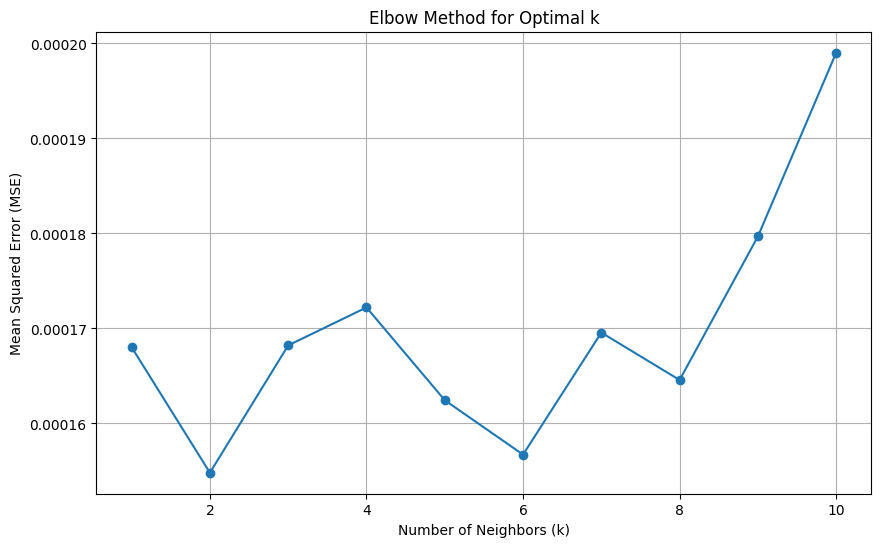

In [36]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [37]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")



Optimal number of neighbors (k): 2


In [38]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=2)

In [39]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [40]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2.2855902710489828e-05
Testing MSE: 0.0001548152132319399
Training R2 Score: 0.9969096174003357
Testing R2 Score: 0.9808960724543829


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTreeRegressor </h1>
</div>

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [42]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

In [43]:
# Make predictions
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [44]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")



Training MSE: 1.4237077499880363e-05
Testing MSE: 0.00015336553511470546
Training R2 Score: 0.9980749823302534
Testing R2 Score: 0.9810749602079697


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForestRegressor </h1>
</div>

In [45]:

from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(n_estimators=200)

In [47]:
# Make predictions
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 3.9434903132099044e-06
Testing MSE: 0.00011078642980112865
Training R2 Score: 0.999466794464421
Testing R2 Score: 0.9863291476091078


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> XGBRegressor </h1>
</div>

In [48]:

from xgboost import XGBRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
# Make predictions
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 1.5302182899972972e-05
Testing MSE: 5.313002685297778e-05
Training R2 Score: 0.9979309677517461
Testing R2 Score: 0.9934438472659961


<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">Model comparision</p>


In [51]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Initialize an empty list to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df


,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,7.270060e-04,0.000736,0.901700,0.909202
1,Decision Tree,3.464987e-08,0.000111,0.999995,0.986322
2,Random Forest,5.471083e-06,0.000116,0.999260,0.985626
3,XGBoost,5.632027e-06,0.000085,0.999238,0.989550


<p style="font-family:newtimeroman; font-size:200%; text-align:center; color:#00008B;">Conclusion</p>


<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">All models perform well, Random Forest and XGBoost stand out as they maintain high accuracy on unseen data, making them preferred choices for deployment in scenarios requiring reliable predictions.</h1>
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Thanks for exploring my notebook. Upvote if you like the work. Also, Give your feedback in comments.</h1>
</div>